# Домашнее задание 4 (Random Forest)
## Общая информация

В каждом пункте от вас потребуется дописать код, необходимый для реализации задания, а так же ответить на ряд вопросов, проанализировав полученные результаты. Просьба отвечать на вопросы развёрнуто, аппелируя к полученным значениям или графикам, ответы вписывать в отдельную ячейку, выбрав для неё тип "Markdown". От полноты и качества ответов будет во многом зависеть ваша итоговая оценка.

Максимальная оценка за задание: 10 баллов

Максимальная оценка за бонусную часть: 10 баллов

Описание данных: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

Cсылка на скачивание данных: http://archive.ics.uci.edu/ml/machine-learning-databases/00350/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Считайте данные. Разделите выборку на обучение и контроль в соотношении 70:30. Возьмите в качестве целевой переменной столбец default payment next month, в качестве признаков - остальные столбцы.

In [2]:
df = pd.read_excel('/home/tgorlenko/ML/HW/default of credit card clients.xls')
df.head()
# видим, что первая строка (ID) -- названия столбцов, а не данные.

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
# сохраним имена столбцов в новую переменную
str0 = df.iloc[0, :]
str0

X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_0
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: ID, dtype: object

In [4]:
# удалим строку с именами столбцов
df1 = df.drop(index="ID", axis=0)
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# можно переименоватьм столбцы на осмысленные, но можно оставить и так

# df1.columns = str0
# df1.head()

In [6]:
df1.isnull().sum().sum() # пропущенных значений нет

0

In [7]:
df1.info() # посмотрим на типы объектов

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
X1     30000 non-null object
X2     30000 non-null object
X3     30000 non-null object
X4     30000 non-null object
X5     30000 non-null object
X6     30000 non-null object
X7     30000 non-null object
X8     30000 non-null object
X9     30000 non-null object
X10    30000 non-null object
X11    30000 non-null object
X12    30000 non-null object
X13    30000 non-null object
X14    30000 non-null object
X15    30000 non-null object
X16    30000 non-null object
X17    30000 non-null object
X18    30000 non-null object
X19    30000 non-null object
X20    30000 non-null object
X21    30000 non-null object
X22    30000 non-null object
X23    30000 non-null object
Y      30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [8]:
# изменим тип объектов на int
for i in list(df1.columns):
    df1[i] = pd.to_numeric(df1[i])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
X1     30000 non-null int64
X2     30000 non-null int64
X3     30000 non-null int64
X4     30000 non-null int64
X5     30000 non-null int64
X6     30000 non-null int64
X7     30000 non-null int64
X8     30000 non-null int64
X9     30000 non-null int64
X10    30000 non-null int64
X11    30000 non-null int64
X12    30000 non-null int64
X13    30000 non-null int64
X14    30000 non-null int64
X15    30000 non-null int64
X16    30000 non-null int64
X17    30000 non-null int64
X18    30000 non-null int64
X19    30000 non-null int64
X20    30000 non-null int64
X21    30000 non-null int64
X22    30000 non-null int64
X23    30000 non-null int64
Y      30000 non-null int64
dtypes: int64(24)
memory usage: 5.7+ MB


In [9]:
y = df1["Y"]
X = df1.iloc[:,:23]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 2. Далее, используя лишь обучающую выбоку и кросс валидацию с пятью фолдами, обучите Random Forest, Decision tree, Logistic regression, KNN с параметрами по умолчанию. Качество оценивайте по метрике accuracy. Какой из алгоритмов дал лучшее качество классификации?

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np

Идея: 

1. Сначала разбиваем выборку X_train на обучающую (X_train_train) и тестовую (X_train_test) с помощью кросс-вадидации
2. Для каждого разбиения запускаем обучение алгоритма из списка classifier. Т.е. все алгоритмы в равных условиях, входные данные на каждой итерации у них одинаковые
3. Запомним результаты вычислений в матрицу all_err, где по строкам записаны значения всех алгоритмов по конкретной выборке
4. Оценка качества алгоритма -- среднее значение по столбцам. Их запишем в список errors
5. Найдем максимальный элемент в списке errors, и найдем какому классификатору это значение соответствует

In [25]:
classifier = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier()]

In [54]:
def winner(list_acc_score, list_clf):
    max_elem = max(list_acc_score)
    ind = list_acc_score.index(max_elem)
    clf_ind = list_clf[ind]
    print('THE BEST RESULT is {:.4f} for {}'.format(max_elem, clf_ind))

In [55]:
kf = KFold(n_splits=5, shuffle=True)
all_err = []

for train_index, test_index in kf.split(X_train): # для каждого разбиения обучаем классификатор
    accuracy = []
    for clf in classifier:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train_train, X_train_test = np.array(X_train)[train_index], np.array(X_train)[test_index]
        y_train_train, y_train_test = np.array(y_train)[train_index], np.array(y_train)[test_index]
        clf.fit(X_train_train, y_train_train)
        p = float(accuracy_score(y_train_test, clf.predict(X_train_test)))
        accuracy.append(p)
    all_err.append(accuracy)     # по строкам: вероятность по кажому алгоритму для одного и того же разбиения выборки

errors = list(np.mean(all_err, axis=0))     # качество алгоритма -- среднее значение по столбцам

for i in range(len(classifier)):
    print("For {} accuracy metrics is {:.4f}\n".format(classifier[i], errors[i]))

print('-'*100,'\n')
winner(errors, classifier)


For RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) accuracy metrics is 0.8039

For DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') accuracy metrics is 0.7301

For LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          

#### 3. Оцените важность признаков с помощью Random forest. Постройте график важности признаков. Какие выводы можно сделать? Можно ли избавиться от каких-нибудь признаков? Если да, то попробуйте сделать это и сравните качество.

для оценки важности признака сначала обучите классификатор, а потом используйте метод feature_importances_

чтобы построить график используйте plt.bar(), как на семинаре

Text(0.5,0,'Признак')

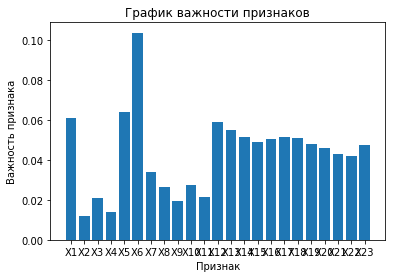

In [38]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

plt.bar(np.arange(X_train.shape[1]), clf_rf.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X_train.columns)
plt.title("График важности признаков")
plt.ylabel('Важность признака')
plt.xlabel('Признак')

Видно, что признак Х6 имеет сильное влияние, а вот признаки X2, X3, X4, X7, X8, X9, X10, X11 -- слабое. Избавимся от этих признаков. Измерим качество для выборки X_train с указанными признаками и без них.

In [16]:
acc = accuracy_score(y_test, clf_rf.predict(X_test))
acc

0.811

In [22]:
X_train_new = X_train.drop(columns=["X2", "X3", "X4", "X8", "X9", "X10", "X11"], axis=1)
X_test_new = X_test.drop(columns=["X2", "X3", "X4", "X8", "X9", "X10", "X11"], axis=1)

In [25]:
clf_rf_new = RandomForestClassifier()
clf_rf_new.fit(X_train_new, y_train)

acc_new = accuracy_score(y_test, clf_rf_new.predict(X_test_new))
print("Качество увеличилось на {:.6f}".format(acc_new - acc))

Качество увеличилось на 0.000444


#### 4. Изменяя параметр n_estimators в Random Forest  посмотрите как меняется качество на кросс варидации. Постройте график. Сделайте выводы.

In [41]:
n_est = [5, 10, 25, 50, 100, 200, 500]

In [42]:
err = []     # список, куда будем добавлять вероятность правильных ответов
for i in n_est:
    clr_rf = RandomForestClassifier(n_estimators=i)
    p = np.mean(cross_val_score(clr_rf, X_train, y_train, scoring = 'accuracy', cv=5))
    err.append(p)
print(err)

[0.7889531130628857, 0.8089525805798624, 0.8127620137998118, 0.8169045989201937, 0.8192857214042766, 0.8193332270624063, 0.8196666851419943]


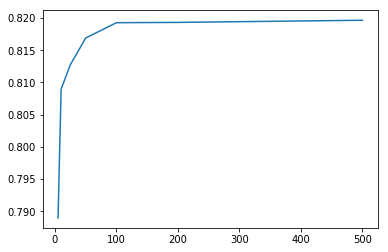

In [43]:
plt.plot(n_est, err)

С увеличение числа деревьев, точноть увеличивается. Однако после 100 деревьев, точность растет не очень сильно. Т.е. нет смысла нагружать компьютер лишней работой ради уточнения 3-4 цифры после запятой.

#### 5. Настройте наиболее важные параметры всех алгоритмов используя sklearn.grid_search.GridSearchCV так, чтобы добиться максимально хорошего качества на кросс валидации.

В KNN настройте следующие параметры:

- n_neighbors 
- metric (если используете minkowski то следует настраивать параметр p)
- weights 

В DecisionTree настройте параметры:

- criterion 

- max_depth

- max_features

- min_samples_split

- min_samples_leaf=1


В Random Forest настройте параметры:

- n_estimators

- criterion

- max_features

В LogisticRegression  настройте параметры:

 - penalty 
 - C 
 - max_iter

In [69]:
# настройка KNN
method1 = KNeighborsClassifier(metric='minkowski')
parameters = {"n_neighbors": [1,2,3], "p": [2, 3, 4], "weights":["uniform", "distance"]}
clf_knn = GridSearchCV(method1, parameters, cv=5, scoring='accuracy')
clf_knn.fit(X_train, y_train) 
print(clf_knn.best_params_)

{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}


In [44]:
# настройка DecisionTree
method2 = DecisionTreeClassifier()
parameters = {"criterion": ['gini', 'entropy'], 
              "max_depth": [3, 5, 10], 
              "max_features": [1, 3, 5, 7, 10, 15, 23],
              "min_samples_split": [2, 3],
              "min_samples_leaf" : [1, 2]
             }
clf_dt = GridSearchCV(method2, parameters, cv=5, scoring='accuracy')
clf_dt.fit(X_train, y_train)
print(clf_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [58]:
# настройка Random Forest
method3 = RandomForestClassifier()
parameters = {"criterion": ['gini', 'entropy'], 
              "max_features": [1, 3, 5, 10, 15, 23],
              "n_estimators": [10, 50, 100]
             }
clf_rf = GridSearchCV(method3, parameters, cv=5, scoring='accuracy')
clf_rf.fit(X_train, y_train)
print(clf_rf.best_params_)

{'criterion': 'entropy', 'max_features': 10, 'n_estimators': 100}


In [34]:
# настройка LogisticRegression
method4 = LogisticRegression()
parameters = {"penalty": ["l1", "l2"], 
              "C": [0.1, 1, 10],
              "max_iter": [50, 100, 200]
             }
clf_lr = GridSearchCV(method4, parameters, cv=5, scoring='accuracy')
clf_lr.fit(X_train, y_train)
print(clf_lr.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1'}


**6. Какое качество дают алгоритмы с настроеенными параметрами на контрольной части выборки? Какой из алгоритмов лучше справился с задачей?**

In [79]:
clf_with_params = [RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=10), 
                   DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=15, min_samples_split=3), 
                   LogisticRegression(C=0.1, max_iter=100, penalty="l1"), 
                   KNeighborsClassifier(n_neighbors=2)]

In [60]:
accuracy = []
for clf in clf_with_params:
    clf.fit(X_train, y_train)
    acc = float(accuracy_score(y_test, clf.predict(X_test)))
    accuracy.append(acc)
    print("For {} accuracy metrics is {:.4f}\n".format(clf, acc))

print('-'*100,'\n')
winner(accuracy, clf_with_params)

For RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) accuracy metrics is 0.8113

For DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') accuracy metrics is 0.8116

For LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          pe

### Бонусная часть

Подробнее про стэкинг можно почитать здесь: https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/

#### 7. Реализуйте стэкинг над алгоритмами, которые вы уже прошли. Удалось ли достичь лучшего качества?

In [21]:
list_clf_stack = [RandomForestClassifier(n_estimators=100, criterion='entropy'),
                  DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3),
                  LogisticRegression(C=0.5, max_iter=100, penalty="l2"),
                  KNeighborsClassifier(n_neighbors=7),
                  KNeighborsClassifier(n_neighbors=3),
                 ]
                

In [22]:
def matrix_train_predict(list_clf, X_data, y_data):
    '''
    list_clf -- список алгоритмов, используемый при стекинге
    X_data -- обучающая выборка
    y_data  -- ответы на обучающей выборке
    
    функция возвращает: 
    1) матрицу А ответов алгоритмов на обучающей выборке с использованием кросс-валидации.
    type(A) -- numpy array
    2) numpy array y_cv перемешанных в соответствиии с кросс-валидацией правильных ответов
    
    '''
    kf = KFold(n_splits=5, shuffle=True)

    A = np.zeros((1,len(list_clf)))   # матрица с ответами алгоритмов
    y_cv = []                         # список перемешанных правильных ответов

    for train_index, test_index in kf.split(X_data): # для каждого разбиения обучаем классификатор
        all_predict = []

        X_train_train, X_train_test = np.array(X_data)[train_index], np.array(X_data)[test_index]
        y_train_train, y_train_test = np.array(y_data)[train_index], np.array(y_data)[test_index]  
        
        y_cv.extend(y_train_test)

        for clf in list_clf:
            #print("TRAIN:", train_index, "TEST:", test_index)

            clf.fit(X_train_train, y_train_train)
            list_predict = np.array(clf.predict(X_train_test))     # ответ алгоритма
            all_predict.append(list_predict)                       # список ответов всех алгоритмов 
                                                                   # на конкретоном фолде


        all_predict = np.c_[all_predict].T                         # ответы алгоритмов вытягиваем в столбцы

        A = np.concatenate((A, all_predict), axis=0)

    A = A[1:, :]

    y_cv = np.array(y_cv)
    return A, y_cv

#A_stacking = matrix_train_predict(list_clf_stack, X_train, y_train)

In [23]:
def matrix_test_predict(list_clf, X_data, y_data, X_data_test):
    
    '''
    list_clf -- список алгоритмов, используемый при стекинге
    X_data -- обучающая выборка
    y_data  -- ответы на обучающей выборке
    X_data_test -- тестовая выборка
    
    функция возвращает матрицу b ответов алгоритмов на тестовой выборке
    type(b) -- numpy array
    '''
    
    b  = []
    
    for clf in list_clf:
        clf.fit(X_data, y_data)
        list_predict = np.array(clf.predict(X_data_test))
        b.append(list_predict)
                   
    b = np.c_[b].T
    
    return b
                                
#b_stacking = matrix_test_predict(list_clf_stack, X_train, y_train, X_test)                

In [37]:
def stacking(list_clf, X_data, y_data, X_data_test):
    '''
    list_clf -- список алгоритмов, используемый при стекинге
    X_data -- обучающая выборка
    y_data  -- ответы на обучающей выборке
    X_data_test -- тестовая выборка
    Y_data_test -- ответы на тестовой выборке
    '''
    
    A_stacking, y_train_cv = matrix_train_predict(list_clf, X_data, y_data)
    b_stacking = matrix_test_predict(list_clf, X_data, y_data, X_data_test) 
    
    clf = DecisionTreeClassifier()
    clf.fit(A_stacking, y_train_cv)
    res = clf.predict(b_stacking)
    return res

In [38]:
res_stacking = stacking(list_clf_stack, X_train, y_train, X_test)
acc_stack = accuracy_score(y_test, res_stacking)
print(acc_stack)

/home/tgorlenko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tgorlenko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tgorlenko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tgorlenko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tgorlenko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

0.8177777777777778


С помощью стекинга удалось немного повысить качество.